# ***Iris Dataset Analysis***

## 📁 Task 1: Dataset Loading & Cleaning
### 🔹 Import Libraries

In [40]:
# Importing all function needed

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Enable inline plotting for Jupyter notebooks
%matplotlib inline


### 🔹 Load the Iris Dataset with Error Handling

In [41]:
# 2. Loading the Iris Data/File

local_filename = r"datasets\iris\iris.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.csv"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]


try:
    if not os.path.exists(local_filename):
        print("File not found locally. Attempting to download from URL...")
        df = pd.read_csv(url, names=column_names)
        df.to_csv(local_filename, index=False)
    else:
        print("Loading data from local file...")
        df = pd.read_csv(local_filename, names=column_names)

except Exception as e:
    print(f"An error occurred: {e}")

print()


Loading data from local file...



### 🔹 Inspect the Dataset

In [42]:
# 3. Inspect/Explore the Iris Dataset

#  Prints the first few rows of the dataset
print("First Few Rows of Iris Dataset: ")
print()
print(f"{df.head()}\n")


# Iris Dataset DataTypes
print("Iris Dataset DataTypes: ")
print()
print(f"{df.dtypes}\n")

# Inspect if there be any empty/missing values
print(f"Missing values per column ---> Columns: {df.columns}")
print(f"Columns: {df.columns.isnull()}\n")

print("Missing values in the entire dataset: ")
print(f"{df.isnull().sum().sum()}\n")



First Few Rows of Iris Dataset: 

   sepal_length  sepal_width  petal_length  petal_width      species
0           0.0          1.0           2.0          3.0            4
1           5.1          3.5           1.4          0.2  Iris-setosa
2           4.9          3.0           1.4          0.2  Iris-setosa
3           4.7          3.2           1.3          0.2  Iris-setosa
4           4.6          3.1           1.5          0.2  Iris-setosa

Iris Dataset DataTypes: 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Missing values per column ---> Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Columns: [False False False False False]

Missing values in the entire dataset: 
0



## 📊 Task 2: Basic Data Analysis

### 🔹 Summary Statistics

In [43]:
# BASIC DATA ANALYSIS
print("Basic Statistics such as, Mean, Median, Standard Deviation etc.: ")
print()
print(f"{df.describe()}\n")


Basic Statistics such as, Mean, Median, Standard Deviation etc.: 

       sepal_length  sepal_width  petal_length  petal_width
count    151.000000   151.000000    151.000000   151.000000
mean       5.804636     3.040397      3.747020     1.210596
std        0.952494     0.463347      1.764343     0.774610
min        0.000000     1.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     3.000000



### 🔹 Add Species Names for Readability

In [44]:
print("Grouping Data for Further Insights: ")

# Load the iris dataset
iris_data = load_iris()

# Create DataFrame with features
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Add the target column
df['target'] = iris_data.target # gives numeric class labels (e.g., 0, 1, 2)

Grouping Data for Further Insights: 


### 🔹 Group by Species and Calculate Means

In [45]:
# Add species names (categorical labels: array-like)
df['species'] = df['target'].apply(lambda x: iris_data.target_names[x]) # maps the numeric class to its string name

# Group by species and calculate the average of numeric columns per species.
grouped = df.groupby('species').mean(numeric_only=True)
print(grouped)



            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  target  
species                               
setosa                 0.246     0.0  
versicolor             1.326     1.0  
virginica              2.026     2.0  


#### ***🧠 Observations***
* Setosa species tend to have the smallest petal and sepal sizes.

* Virginica generally has the largest petal length and width.

* Petal length and width are strong indicators of species.

## 📉 Task 3: Data Visualizations

### 🔹 Set Plotting Style

In [46]:
sns.set(style="whitegrid")

### 📈 1. Line Chart — Sepal Length Over Time by Species

Line Chart: 


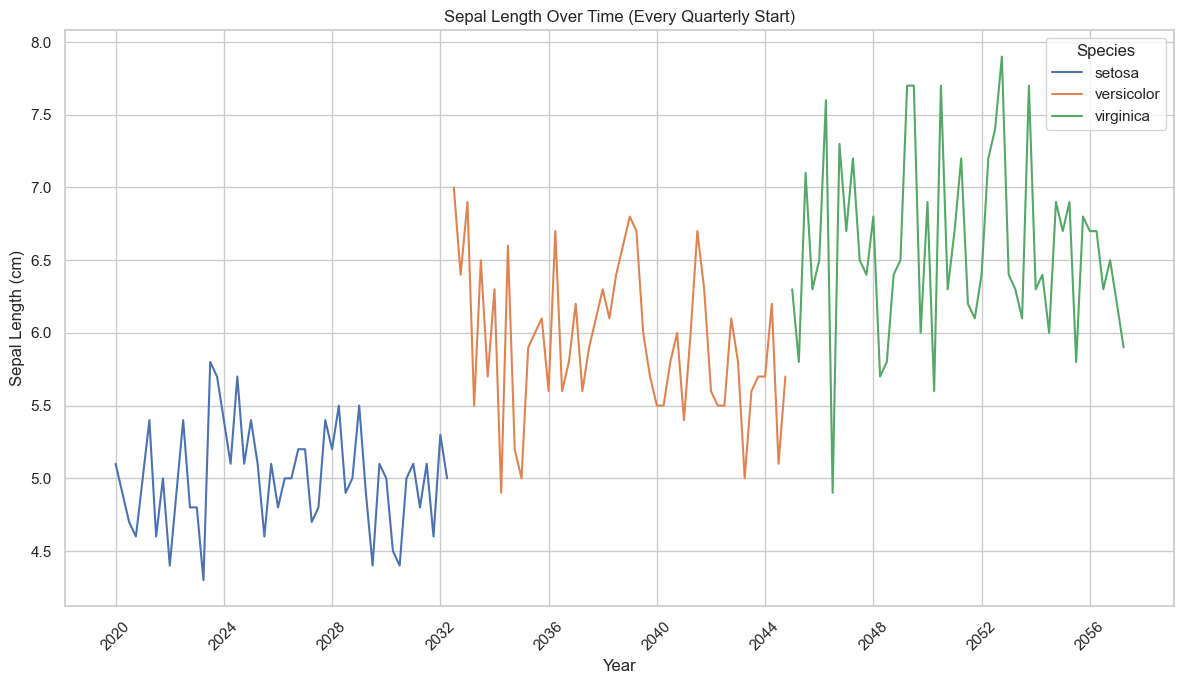

In [47]:
# Data Visualization: Line Chart

print(f"Line Chart: ")

# Simulate a time column
df_time = df.copy()
df_time['date'] = pd.date_range(start='2020-01-01', periods=len(df_time), freq='QS')

plt.figure(figsize=(12, 7))
sns.lineplot(x='date', y='sepal length (cm)', data=df_time, hue="species")
plt.title("Sepal Length Over Time (Every Quarterly Start)")
plt.xlabel("Year")
plt.ylabel("Sepal Length (cm)")
plt.xticks(rotation=45)
plt.legend(title="Species")
plt.tight_layout()
plt.show()


#### ***✅ Explanation***
- X-axis: Simulated year

- Y-axis: Sepal length (cm)

- Colored lines: Show how sepal length varies per species over time (for every quarterly year start).

- Even though the time is simulated, this mimics real-world trend analysis.

### 📊 2. Bar Chart — Average Petal Length per Species

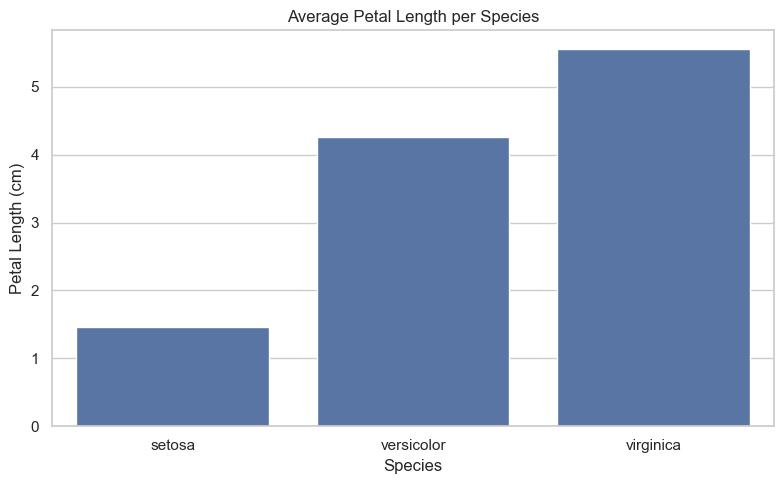

In [48]:
# Data Visualization: Bar Chart

plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped['petal length (cm)'])
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.show()


#### ***✅ Explanation***
* Compares the mean petal length across species.

* Clear distinction between Setosa, Versicolor, and Virginica.

### 📊 3. Bar Chart — Average Petal Width per Species

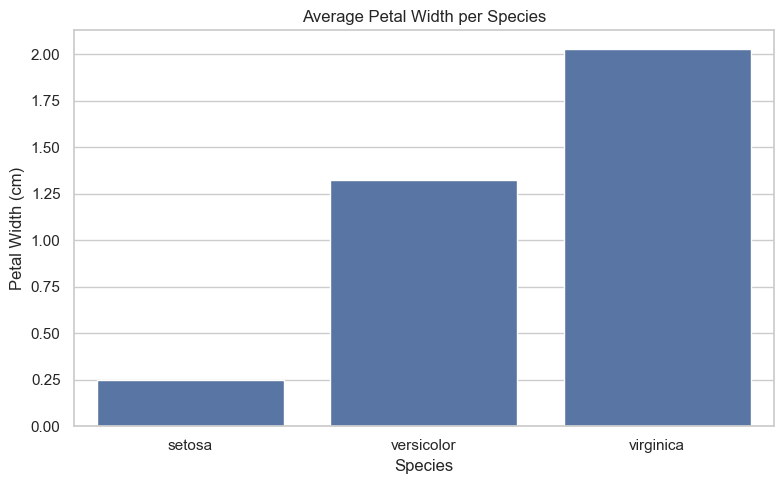

In [49]:
# Data Visualization: Bar Chart

plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped['petal width (cm)'])
plt.title("Average Petal Width per Species")
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.tight_layout()
plt.show()

#### ***✅ Explanation***

- Compares the mean petal width across species.

- Clear distinction between Setosa, Versicolor, and Virginica.


### 📊 4. Bar Chart — Average Sepal Length per Species

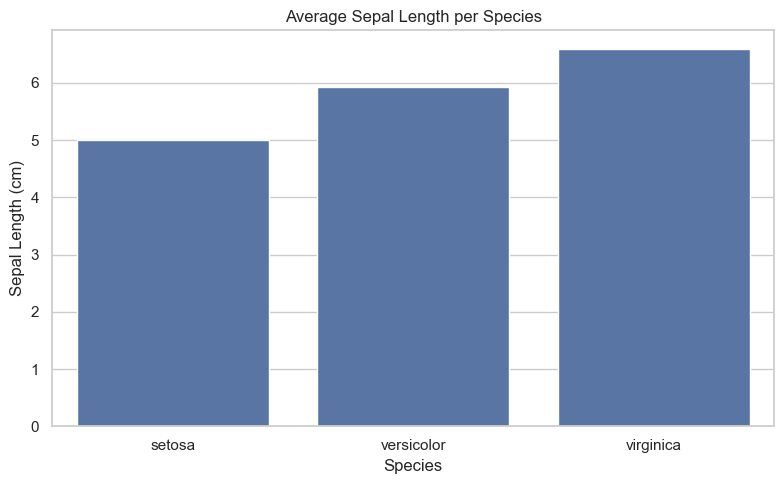

In [50]:
# Data Visualization: Bar Chart

plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped['sepal length (cm)'])
plt.title("Average Sepal Length per Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.tight_layout()
plt.show()

#### ***✅ Explanation***

* Compares the mean sepal length across species.

* Clear distinction between Setosa, Versicolor, and Virginica.


### 📉 5. Histogram — Distribution of Sepal Width

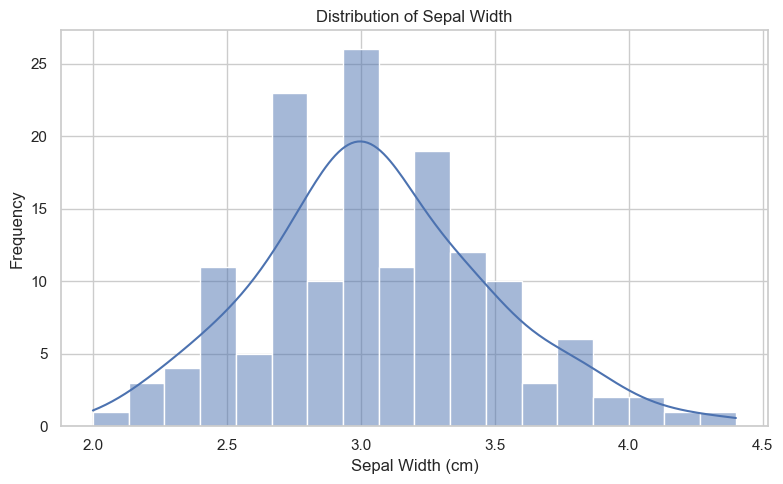

In [51]:
# Data Visualization: Histogram

plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], bins=18, kde=True)
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### ***✅ Explanation***

* Shows the distribution shape of sepal width.

* KDE (kernel density estimate) helps visualize underlying probability.


### ⚫ 6. Scatter Plot — Sepal Length vs. Petal Length

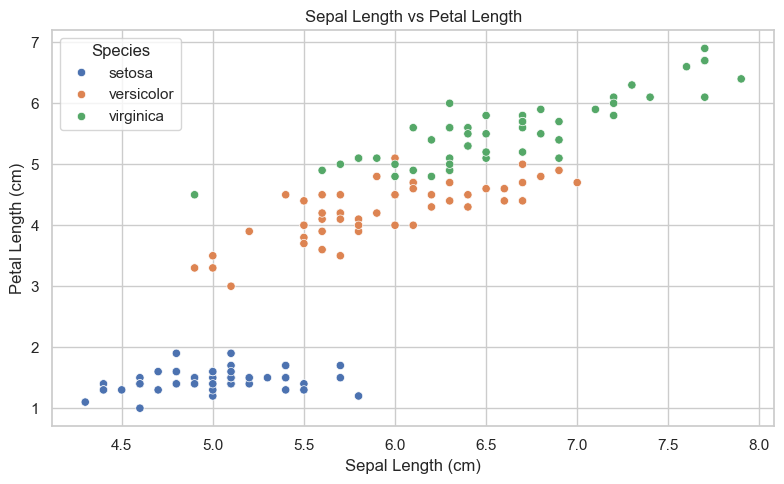

In [52]:
# Data Visualization: Scatterplot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title='Species')
plt.tight_layout()
plt.show()


#### ***✅ Explanation***

* Scatter plot shows relationship between two numeric features.

* Clear clusters visible, especially Setosa, which is well-separated.


## **✅ Summary of Findings:**

1. Petal features varies distinctly between species, hence useful for classification.

2. Setosa stands out with distinctively lower petal and sepal sizes.

3. Visualizations confirm strong species separation—especially in petal-related measurements.

4. Using seaborn with grouping and coloring adds clarity to identifying trends and patterns between species.